# 신호를 이용한 연산

In [2]:
# library import
import matplotlib.pyplot as plt
import numpy as np

## 신호 생성 및 plot

In [3]:
# step unit function
t_org = np.arange(-3, 3, 0.1)
x_t_org = np.heaviside(t_org, 1)  # 단위 계단 함수 => t=0인 점에서 계단 모양의 함수

# sine, cosine
s_t_org = np.sin(t_org)
c_t_org = np.cos(t_org)

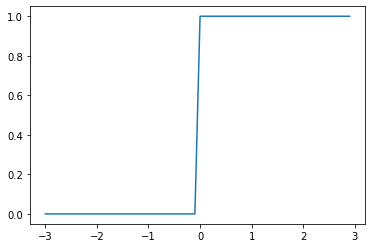

In [4]:
# plot
plt.plot(t_org, x_t_org)
plt.show()

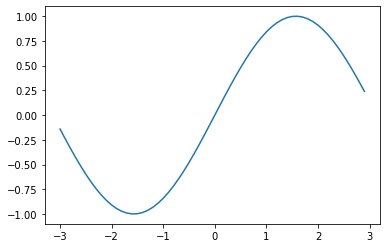

In [5]:
# plot
plt.plot(t_org, s_t_org)
plt.show()

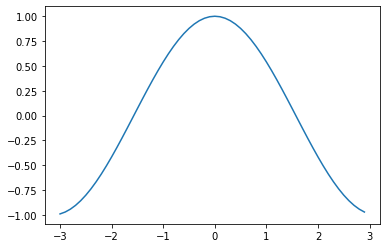

In [6]:
# plot
plt.plot(t_org, c_t_org)
plt.show()

## 신호의 기본 연산

### Scale-modification

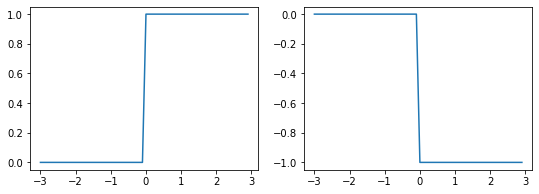

In [7]:
# 크기 반전
x_t = -x_t_org
s_t = -s_t_org
c_t = -c_t_org

# plot
# fig = plt.figure()  # 가로 세로 비율 고려 x
fig = plt.figure(figsize=(9, 3))  # 가로 세로 비율 지정
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, x_t_org)
ax2.plot(t_org, x_t)
plt.show()

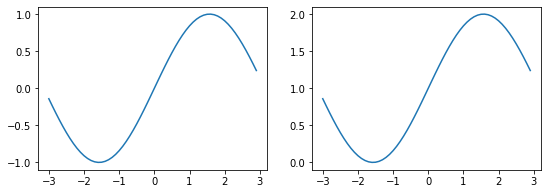

In [8]:
# 크기 이동
x_t = x_t_org +1 
s_t = s_t_org +1 
c_t = c_t_org +1 

# plot
# fig = plt.figure()
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, s_t_org)
ax2.plot(t_org, s_t)
plt.show()

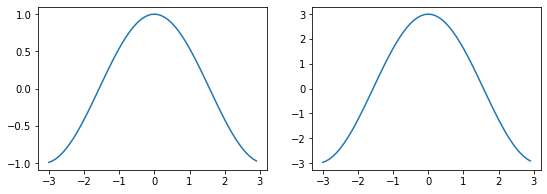

In [9]:
# 크기 척도 조절
x_t = 3 * x_t_org
s_t = 3 * s_t_org 
c_t = 3 * c_t_org 

# plot
# fig = plt.figure()
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, c_t_org)
ax2.plot(t_org, c_t)
plt.show()

### Time-modification

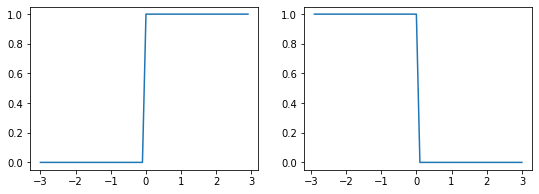

In [10]:
# 시간 반전
t = -t_org

# plot
# fig = plt.figure()
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, x_t_org)
ax2.plot(t, x_t_org)
plt.show()

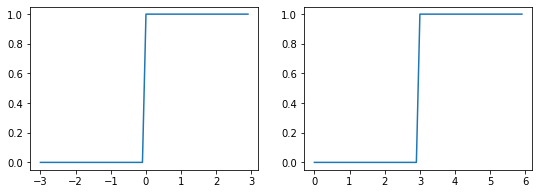

In [11]:
# 시간 이동
t = t_org + 3

# plot
# fig = plt.figure()
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, x_t_org)
ax2.plot(t, x_t_org)
plt.show()

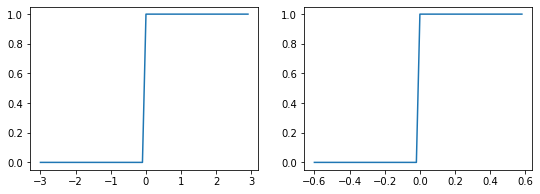

In [12]:
# 시간 척도 조절
t = t_org * 0.2

# plot
# fig = plt.figure()
fig = plt.figure(figsize=(9, 3))
ax1 = fig.add_subplot(1,2,1)  # (세로 등분, 가로 등분, 그림 순서)
ax2 = fig.add_subplot(1,2,2)
ax1.plot(t_org, x_t_org)
ax2.plot(t, x_t_org)
plt.show()

## Exercise

x(t)의 파형이 unit step function일 때,


아래와 같이 신호 x(t)에 여러 연산을 수행하여 만든 y(t)가 있다.

y(t)의 파형을 직접 그려 보아라.

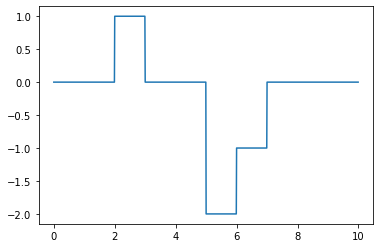

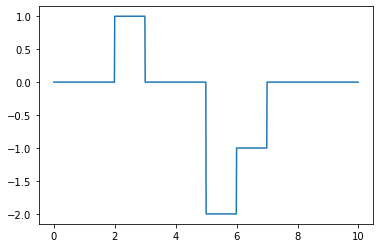

In [13]:
t = np.arange(0, 10, 0.01)

x = np.heaviside(t-2, 1) - np.heaviside(t-3, 1) - 2*np.heaviside(t-5, 1) + np.heaviside(t-6, 1) + np.heaviside(t-7, 1)

plt.plot(t, x)
plt.show()

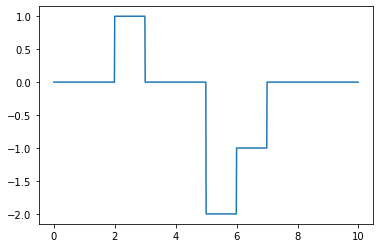

In [49]:
t = np.arange(0, 10, 0.01) 

x = np.heaviside(t-2, 1) - np.heaviside(t-3, 1) - 2*np.heaviside(t-5, 1) + np.heaviside(t-6, 1) + np.heaviside(t-7, 1)

plt.plot(t, x) 
plt.show()


# Convolution (합성곱)

In [ ]:
m=np.array([[1,2,3,0],
            [0,1,2,3],
            [3,0,1,2],
            [2,3,0,1]]) 
f=np.array([[2,0,1],
            [0,1,2],
            [1,0,2]]) 
result=[] 
mx,my=np.shape(m) 
fx,fy=np.shape(f) 

for i in range(mx-fx+1): 
  for j in range(my-fy+1): 
    result.append((m[i:i+fy,j:j+fy]*f).sum()) 
    
result=np.array(result).reshape(2,2) 
print(result)

[[15 16]
 [ 6 15]]


In [ ]:
def convolution(m,f,s=1): 
  mx,my=np.shape(m) 
  fx,fy=np.shape(f) 
  if (mx-fx)%s==0 and (my-fy)%s==0: 
    print('convolution 연산 가능') 
    o=[] 
    for i in range(0,mx-fx+1,s): 
      for j in range(0,my-fy+1,s): 
        o.append((m[i:i+fx,j:j+fy]*f).sum()) 
    ow=int((mx-fx)/s)+1 
    oh=int((my-fy)/s)+1 
    print('ouptput 크기=(%s,%s)'%(ow,oh)) 
    o=np.array(o).reshape(oh,ow) 
    return o
  else: 
    print('convolution 연산 불가능') 
    print('(mx-fx)%s=',(mx-fx)%s) 
    print('(my-fy)%s=',(my-fy)%s) 
    return 

print(convolution(m,f,s=1))

convolution 연산 가능
ouptput 크기=(2,2)
[[15 16]
 [ 6 15]]
